# <a href="https://thetahat.ru/courses/bm-2024-aut">Статистика ФБМФ</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 25 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 30 баллов


-----

In [1]:
# Bot check

# HW_ID: st_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [30]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.special import comb

sns.set(palette='Set2')

## <b><i><font color="blue">Легкая часть</font></i></b>


### Задача 1

 Пусть $X_1, ...,  X_n$ --- выборка из неизвестного распределения $\mathsf{P}$. Для проверки гипотез $\mathsf{H}_0\ vs.\ \mathsf{H}_1$ было решено использовать три различных критерия. Соответствующие p-value равны 0.00001, 0.7361, 0.0482. Какое должно быть принято решение об отвержении гипотезы $\mathsf{H}_0$ на уровне значимости 0.05?

### Задача 2

Проведены эксперименты для оценки эффективности нескольких препаратов для снижения послеоперационной тошноты. Результаты экспериментов приведены в таблице ниже. При проведении эксперимента пациенты делились на группы случайным образом.

    
|| Количество пациентов   | Количество случаев возникновения тошноты |
|-----------| ----------- | -------|
|Плацебо|80|45|
|Хлорпромазин|75|26|
|Дименгидринат|85|52|
|Пентобарбитал (100 мг)|67|35|
|Пентобарбитал (150 мг)|85|37|

    

In [5]:
data = pd.DataFrame([["Плацебо", 80, 45],
    ["Хлорпромазин", 75, 26],
    ["Дименгидринат", 85, 52],
    ["Пентобарбитал (100 мг)", 67, 35],
    ["Пентобарбитал (150 мг)", 85, 37]])

data.columns = ["Название", "Количество пациентов", "Количество случаев возникновения тошноты"]

Для каждой пары плацебо / препарат нас имеются две бернуллиевские выборки: $$X = (X_1, \ldots, X_n) \sim Bern(\theta_1) \\ Y = (Y_1, \ldots, Y_m) \sim Bern(\theta_2)$$
Первая из которых будет соответствовать какому-то препарату (индикатор того, что тошнота **отсутствует**), а вторая &mdash; плацебо.

Проверяется $\mathsf{H}_0 \colon \theta_1 = \theta_2 \ vs. \ \mathsf{H}_1 \colon \theta_1 > \theta_2$.

Будем использовать критерий Вальда (см. пример с лекции):
$$
W(X, Y) = \frac{\overline{X} -\overline{Y}}{\widehat{\sigma}} \xrightarrow[]{d_0} \mathcal{N}(0, 1) \\
\widehat{\sigma} = \sqrt{\frac{\overline{X}(1 - \overline{X})}{n} + \frac{\overline{Y}(1 - \overline{Y})}{m}}
$$



Формула подсчета p-value:

p(w) = Ф(W(X,Y) $\geq$ w)


Для удобства выделим подсчет статистики Вальда в функцию. Вам остаётся лишь заполнить её

In [6]:
def wald_stats(x_mean, n, y_mean, m):
    '''
    Подсчет значения статистики Вальда.

    :param x_mean: среднее значение по выборке X
    :param n: размер выборки X
    :param y_mean: среднее значение по выборке Y
    :param m: размер выборки Y

    :return: посчитанное значение статистики Вальда
    '''
    return (x_mean - y_mean)/np.sqrt((x_mean*(1-x_mean)/n)+(y_mean*(1-y_mean)/m))

 Проведите сравнение каждого препарата по эффективности по отношению к плацебо c использованием критерия Вальда. Приведите значения статистики критерия Вальда, p-value и скорректированные p-value (т.е. примените метод Бонферрони).

In [13]:
for index, row in data.iterrows():
    if row['Название'] == 'Плацебо':
      pl_mean = 1 - row['Количество случаев возникновения тошноты'] / row['Количество пациентов']
      pl_n = row['Количество пациентов']

In [18]:
results = []
for index, row in data.iterrows():
    if row['Название'] != 'Плацебо':
        drug_mean = 1 - row['Количество случаев возникновения тошноты'] / row['Количество пациентов']
        drug_n = row['Количество пациентов']
        w = wald_stats(drug_mean, drug_n, pl_mean, pl_n)
        p_value = sps.norm.sf(w)
        results.append({
            'препарат': row['Название'],
            'статистика Вальда': w,
            'p-value': p_value
        })

results_df = pd.DataFrame(results)

num = len(results_df)
results_df['скорректированное p-value'] = results_df['p-value'] * num

In [19]:
results_df

,препарат,статистика Вальда,p-value,скорректированное p-value
0,Хлорпромазин,2.764364,0.002852,0.011407
1,Дименгидринат,-0.642987,0.739884,2.959535
2,Пентобарбитал (100 мг),0.486428,0.313332,1.253328
3,Пентобарбитал (150 мг),1.646605,0.049820,0.199278


Не забудьте про выводы

делать выводы насчет эффективности нужно по скорректированному p-value.

у Хлорпромазина p-value < $\alpha$, значит, $H_0$ отвергается и препарат работает лучше плацебо, случаев отсутствия тошноты больше.

у Дименгидрината p-value > $\alpha$, значит, $H_0$ не отвергается и препарат работает хуже плацебо, случаев отсутствия тошноты меньше.

у Пентобарбитал (100 мг) p-value > $\alpha$, значит, $H_0$ не отвергается и препарат работает хуже плацебо, случаев отсутствия тошноты меньше.

у Пентобарбитал (150 мг) p-value > $\alpha$, значит, $H_0$ не отвергается и препарат работает хуже плацебо, случаев отсутствия тошноты меньше.


## <b><i><font color="orange">Сложная часть</font></i></b>

### Задача 3


Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события.
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.


Для этой задачи воспользуемся критерием $$S = \left\{T(X) \geqslant c_\alpha\right\},$$ где $T(X) = \sum_{i=1}^n X_i$, критическое значение $c_\alpha = u_{1-\alpha} + 1$.

Чему тогда будет равно значение p-value?

$p(t) = \frac{1}{2^n} \sum_{j=t}^{n} С_n^{j}$

Перед началом эксперимента стоит задаться вопросом, а каким должно быть истинное значение $p$, чтобы с точки зрения практики можно было бы считать, что связь между черным котом и неудачей имеется?

Вообще говоря, пороговое значение должно выбираться отдельно для каждой задачи. В данном случае можем считать, что если $p \geqslant 0.6$, то связь есть.

Следующий вопрос &mdash; сколько необходимо провести экспериментов? Никто не хочет долго ждать, а уж тем более расходовать огромное количество ресурсов на большое количество экспериментов, однако все хотят, чтобы у критерия была достаточная мощность.

Для начала сгенерируйте 10 выборок для двух случаев:
1. $n=5, p=0.75$;
2. $n=10^5, p=0.51$.

В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [28]:
sample1 = sps.binom.rvs(n = 5, p = 0.75, size = 10)
sample2 = sps.binom.rvs(n = 10**5, p = 0.51, size = 10)

In [61]:
def test_hypo(n, p):
  sample = sps.bernoulli.rvs( p = p, size = n)
  T_x = np.sum(sample)
  p_value = sps.binom.sf(np.sum(sample) - 1, n, 0.5)
  decision = [1 if p_value < 0.05 else 0]
  return p_value, T_x, decision

In [65]:
results = []
for i in range (10):
  n = 5
  p = 0.75
  p_value, T_x, decision = test_hypo(n = n, p = p)
  results.append({
            'n': n,
            'p': p,
            'T(X)': T_x,
            'p-value': p_value,
            'Отвержение H_0': decision[0]})
results_df = pd.DataFrame(results)
results_df

,n,p,T(X),p-value,Отвержение H_0
0,5,0.75,4,0.18750,0
1,5,0.75,5,0.03125,1
2,5,0.75,3,0.50000,0
3,5,0.75,3,0.50000,0
4,5,0.75,4,0.18750,0
5,5,0.75,5,0.03125,1
6,5,0.75,5,0.03125,1
7,5,0.75,4,0.18750,0
8,5,0.75,5,0.03125,1
9,5,0.75,2,0.81250,0


In [64]:
results = []
for i in range (10):
  n = 10**5
  p = 0.51
  p_value, T_x, decision = test_hypo(n = n, p = p)
  results.append({
            'n': n,
            'p': p,
            'T(X)': T_x,
            'p-value': p_value,
            'Отвержение H_0': decision[0]})
results_df = pd.DataFrame(results)
results_df

,n,p,T(X),p-value,Отвержение H_0
0,100000,0.51,50890,9.230602e-09,1
1,100000,0.51,51015,6.973238e-11,1
2,100000,0.51,50906,5.110006e-09,1
3,100000,0.51,51468,8.320733e-21,1
4,100000,0.51,51219,6.448278e-15,1
5,100000,0.51,50913,3.932831e-09,1
6,100000,0.51,50936,1.641435e-09,1
7,100000,0.51,51007,9.709001e-11,1
8,100000,0.51,51238,2.497644e-15,1
9,100000,0.51,51161,1.068210e-13,1


**Вывод:** при маленьком количестве экспериментов критерий недостаточно мощный (даже при высокой вероятности неудач), только в 4/10 случаев гипотеза была отвергнута.

при большом количестве экспериментов во всех случаях гипотеза была отвергнута, криетрий мощный (хотя p = 0.51 всего лишь)

Теперь разберемся с тем, как подобрать оптимальный размер выборки.

1. Зафиксируйте значение $p^* > 1/2$ (в нашем случае $p^* = 0.6$ ), которое будет обладать следующим свойством.
    - Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
    - В противном случае отклонение с практической точки зрения признается несущественным.
2. Для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05 (пример таких графиков можно найти в лекции).
3. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$. Это значение необходимой мощности критерия определяется на этапе постановки задачи и дизайна эксперимента.

In [86]:
def power_function(n, p, alpha=0.05):
    critical_value = sps.binom.isf(alpha, n, 0.5)
    power = 1 - binom.cdf(critical_value, n, p)
    return power

In [87]:
n_star = 0
n_values = np.arange(10, 201, 1)
for n in n_values:
  if abs(power_function(n, 0.6) - 0.8) < 0.01:
    n_star = n
    break
print(f"оптимальный размер выборки n* = {n_star},  мощность при p* = 0.6 равна {power_function(n_star, p_star)}")


оптимальный размер выборки n* = 154,  мощность при p* = 0.6 равна 0.7903926762786335


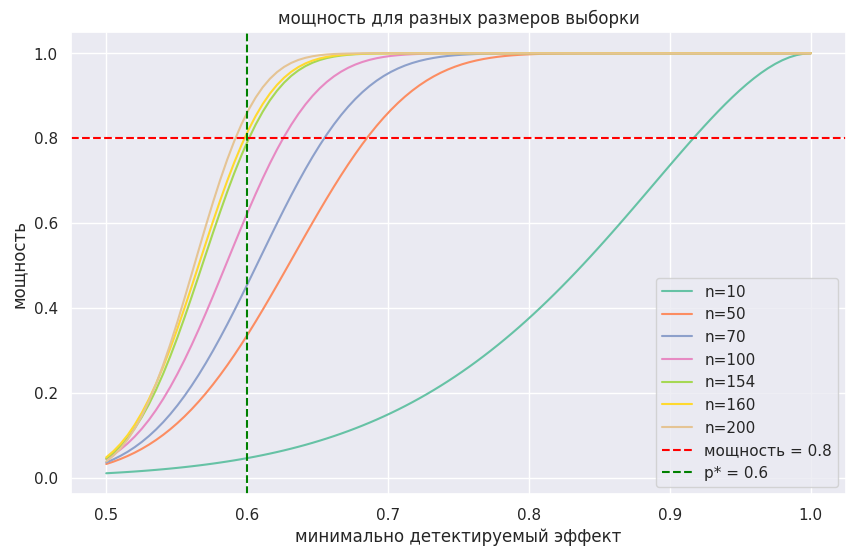

In [88]:
p_star = 0.6
alpha = 0.05
n_values = [10, 50, 70, 100, 154, 160, 200]
p_values = np.linspace(0.5, 1, 100)

plt.figure(figsize=(10, 6))
for n in n_values:
    powers = [power_function(n, p, alpha) for p in p_values]
    plt.plot(p_values, powers, label=f'n={n}')

plt.axhline(y=0.8, color='r', linestyle='--', label='мощность = 0.8')
plt.axvline(x=p_star, color='g', linestyle='--', label='p* = 0.6')

plt.xlabel('минимально детектируемый эффект')
plt.ylabel('мощность')
plt.title('мощность для разных размеров выборки')
plt.legend()
plt.grid(True)
plt.show()

Для выбранного $n^*$ в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и результат проверки, сгенерировав выборки для следующих истинных значений $p$:
 1. $1/2 < p < p^*$;
 2. $p > p^*$.

In [94]:
true_p_1 = np.arange(0.5, 0.6, 0.01)
true_p_2 = np.arange(0.61, 1, 0.01)

results = []

for p in true_p_1:
  n = 154
  p_value, T_x, decision = test_hypo(n = n, p = p)
  results.append({
          'n': n,
          'p': p,
          'T(X)': T_x,
          'p-value': p_value,
          'Отвержение H_0': decision[0]})
results_df = pd.DataFrame(results)
results_df

,n,p,T(X),p-value,Отвержение H_0
0,154,0.50,75,0.656425,0
1,154,0.51,77,0.532096,0
2,154,0.52,88,0.045138,1
3,154,0.53,70,0.886675,0
4,154,0.54,81,0.286423,0
5,154,0.55,81,0.286423,0
6,154,0.56,81,0.286423,0
7,154,0.57,84,0.147407,0
8,154,0.58,94,0.003814,1
9,154,0.59,93,0.006119,1


In [95]:
results = []

for p in true_p_2:
  n = 154
  p_value, T_x, decision = test_hypo(n = n, p = p)
  results.append({
          'n': n,
          'p': p,
          'T(X)': T_x,
          'p-value': p_value,
          'Отвержение H_0': decision[0]})
results_df = pd.DataFrame(results)
results_df

,n,p,T(X),p-value,Отвержение H_0
0,154,0.61,94,3.814144e-03,1
1,154,0.62,105,3.750696e-06,1
2,154,0.63,93,6.118524e-03,1
3,154,0.64,93,6.118524e-03,1
4,154,0.65,98,4.467655e-04,1
5,154,0.66,100,1.307081e-04,1
6,154,0.67,112,7.680745e-09,1
7,154,0.68,107,7.429394e-07,1
8,154,0.69,110,5.243131e-08,1
9,154,0.70,105,3.750696e-06,1


**Вывод:** при оптимальном размере выборки, но при маленьком p (меньше 0.6) в большинстве случаев нулевая гипотеза не отвергается, мощность недостаточная.

при большем p (больше 0.6) $H_0$ всегда отвергается, также p-value уменьшается на несколько порядков при увеличении p, значит, отвержение всё уверенней и уверенней.